In [1]:
%load_ext lab_black
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
import sklearn.ensemble as en
import sklearn.tree as tree
import matplotlib.pyplot as plt
from src.linear_coef_matching import LCM
from src.linear_coef_matching_mf import LCM_MF
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("/Users/harshparikh/Documents/max_df_coarsen.csv", index_col=0)

In [3]:
treatment_arms = np.unique(data["T"])
data_T = {}
for T in treatment_arms:
    data_T[T] = data.loc[data["T"] == T]

In [4]:
treatment_arms

array(['(0.12, 0)', '(0.12, 1)', '(0.38, 0)', '(0.38, 1)', '(0.62, 0)',
       '(0.62, 1)', '(0.88, 0)', '(0.88, 1)'], dtype=object)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(columns=["T", "Y"]), data["Y"], stratify=data["T"]
)

In [6]:
m = en.GradientBoostingClassifier().fit(X_train, y_train)

In [7]:
accuracy_score(y_test, m.predict(X_test))

0.8313253012048193

In [8]:
m.score(X_test, y_test)

0.8313253012048193

In [9]:
df_new = data.copy(deep=True)

In [10]:
treatment_map = {
    "(0.12, 0)": "(0, 0)",
    "(0.12, 1)": "(0, 1)",
    "(0.38, 0)": "(0, 0)",
    "(0.38, 1)": "(0, 1)",
    "(0.62, 0)": "(1, 0)",
    "(0.62, 1)": "(1, 1)",
    "(0.88, 0)": "(1, 0)",
    "(0.88, 1)": "(1, 1)",
}

In [11]:
df_new["T"] = df_new["T"].apply(lambda x: treatment_map[x])

In [12]:
df_new["T"]

sid3       (1, 1)
sid4       (1, 1)
sid5       (0, 1)
sid7       (1, 1)
sid8       (1, 1)
            ...  
sid1986    (1, 1)
sid1989    (0, 1)
sid1990    (1, 1)
sid1991    (1, 1)
sid1999    (0, 0)
Name: T, Length: 995, dtype: object

In [13]:
df_new = df_new.loc[(df_new["T"] == "(0, 0)") | (df_new["T"] == "(1, 0)")]

In [14]:
df_new["T"] = df_new.apply(lambda x: int(x["T"][1]), axis=1)

In [15]:
lcm = LCM_MF("Y", "T", data=df_new, n_splits=3, n_repeats=1)

In [16]:
lcm.fit(method="linear")

/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages

Control Score: 0.813953488372093
Treatment Score: 0.9056603773584906


/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages

Control Score: 0.7441860465116279
Treatment Score: 0.75


/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages

Control Score: 0.7674418604651163
Treatment Score: 0.9423076923076923


/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/harshparikh/opt/anaconda3/lib/python3.9/site-packages

In [24]:
lcm.MG(k=5)

In [25]:
lcm.CATE(cate_methods=[["mean", False]])

In [26]:
lcm.cate_df

,CATE_mean,CATE_mean,CATE_mean,avg.CATE,std.CATE,avg.CATE_mean,std.CATE_mean,T,Y
0,NaN,0.2,0.0,0.1,0.141421,0.1,0.141421,1,1
1,NaN,-0.2,-0.4,-0.3,0.141421,-0.3,0.141421,1,0
2,0.0,0.0,NaN,0.0,0.000000,0.0,0.000000,1,1
3,0.4,0.4,NaN,0.4,0.000000,0.4,0.000000,1,1
4,-0.2,NaN,-0.2,-0.2,0.000000,-0.2,0.000000,1,0
...,...,...,...,...,...,...,...,...,...
281,-0.2,-0.2,NaN,-0.2,0.000000,-0.2,0.000000,0,1
282,-0.8,NaN,0.0,-0.4,0.565685,-0.4,0.565685,0,1
283,-0.2,-0.2,NaN,-0.2,0.000000,-0.2,0.000000,1,1
284,NaN,-0.2,0.0,-0.1,0.141421,-0.1,0.141421,1,0


<AxesSubplot:>

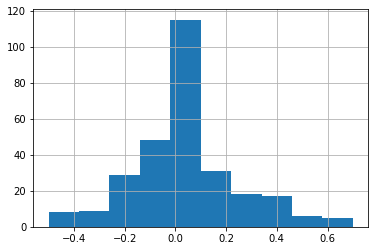

In [28]:
lcm.cate_df["avg.CATE_mean"].hist()